In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant < 3].reset_index(drop=True)

data['feedback_type'] = 0 # complete feedback

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,1,1,1,43,39,2,1,1,1.244082,0,0
1,1,1,2,60,50,4,3,1,1.101821,1,0
2,1,1,3,44,36,4,2,2,1.029923,0,0
3,1,1,4,55,55,4,3,2,1.368007,0,0
4,1,1,5,52,49,4,3,3,1.039329,1,0


## Initialize the model

In [3]:
model = rlssm.RLLBAModel_2A(2,
                            separate_learning_rates=True,
                            nonlinear_mapping=True)

INFO:cmdstanpy:compiling stan file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLLBA_2A/hierRLLBA_2A_2lr_nonlin.stan to exe file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLLBA_2A/hierRLLBA_2A_2lr_nonlin
INFO:cmdstanpy:compiled model executable: /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLLBA_2A/hierRLLBA_2A_2lr_nonlin
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLLBA_2A/hierRLLBA_2A_2lr_nonlin.hpp /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLLBA_2A/hierRLLBA_2A_2lr_nonlin.stan
Warning in '/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLLBA_2A/hierRLLBA_2A_2lr_nonlin.stan', line 94, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLLBA_2A', 'hierRLLBA_2A_2lr_nonlin', 2)

### Fit

In [5]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)


In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains,
                      include_last_values=False,
                      print_diagnostics=False)

Fitting the model using the priors:
alpha_pos_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
alpha_neg_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
k_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
sp_trial_var_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
slop_priors {'mu_mu': -1, 'sd_mu': 0.5, 'mu_sd': 0, 'sd_sd': 1}
drift_asym_priors {'mu_mu': -1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
drift_scaling_priors {'mu_mu': 2, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
drift_variability_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 1, 'sd_sd': 1}


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,3900.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [8]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.0,lp__
mu_alpha_pos,1.0,mu_alpha_pos
mu_alpha_neg,1.0,mu_alpha_neg
mu_k,1.0,mu_k
mu_ndt,1.0,mu_ndt


#### Calculate wAIC

In [9]:
model_fit.waic

{'lppd': -233.05695659519267,
 'p_waic': 11.07267640014489,
 'waic': 488.25926599067515,
 'waic_se': 48.0634507930838}

#### Get posteriors

In [10]:
model_fit.samples

,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_k,transf_mu_ndt,transf_mu_sp_trial_var,transf_mu_slop,transf_mu_drift_asym,transf_mu_drift_scaling,transf_mu_drift_variability,alpha_pos_sbj[1],...,sp_trial_var_sbj[1],sp_trial_var_sbj[2],slop_sbj[1],slop_sbj[2],drift_asym_sbj[1],drift_asym_sbj[2],drift_scaling_sbj[1],drift_scaling_sbj[2],drift_variability_sbj[1],drift_variability_sbj[2]
0,0.010652,0.383737,1.341890,0.450036,1.49297,0.302295,0.166631,3.40035,0.762892,0.011501,...,1.219600,1.296250,0.542197,0.339225,0.387490,0.179417,3.62896,3.60412,0.793968,0.666409
1,0.010947,0.320080,1.190600,0.433953,1.64966,0.315528,0.242967,3.07021,0.664228,0.011422,...,1.243000,1.276430,0.534375,0.373795,0.426172,0.202652,3.31136,3.20631,0.654360,0.648809
2,0.011787,0.307454,1.230980,0.480722,1.58581,0.256848,0.241629,2.90788,0.666064,0.014108,...,1.013440,0.822215,0.570151,0.201385,0.373742,0.186898,3.15076,3.14918,0.652570,0.722070
3,0.012677,0.384798,1.975730,0.322256,1.41904,0.369993,0.086056,5.21530,0.924541,0.013270,...,1.346210,1.438020,0.675205,0.262794,0.017004,1.105360,4.29870,4.06329,0.881225,0.771698
4,0.033968,0.180859,0.957897,0.706467,1.57417,0.497305,0.708377,3.28806,0.928335,0.018886,...,1.355190,1.336080,0.476251,0.455640,0.681027,0.101138,3.29383,3.29186,0.773157,0.831847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.016011,0.267692,1.023320,0.540042,1.13882,0.428178,0.117656,2.66935,0.628308,0.016871,...,1.129950,1.144930,0.548073,0.222156,0.035024,0.263462,2.97127,3.31046,0.619132,0.604790
996,0.014072,0.348281,1.285960,0.462602,1.01504,0.325026,0.093513,2.81681,0.645100,0.014641,...,0.999435,1.022270,0.442150,0.221296,0.013147,0.050187,3.15897,3.02898,0.604125,0.491733
997,0.019210,0.422756,1.285030,0.780634,1.40149,0.464134,0.291355,3.81370,1.082000,0.016936,...,1.445970,1.498350,0.386020,0.355079,0.299037,0.312125,4.01822,3.61900,0.759722,0.757302
998,0.010438,0.455405,1.346250,0.517006,1.57013,0.473391,1.127090,3.48220,0.532031,0.010740,...,1.521820,1.216730,0.907649,0.252273,1.212590,0.783153,4.35664,3.53771,1.150320,0.609817


In [11]:
model_fit.trial_samples

{'k_t': array([[1.34141, 1.34141, 1.34141, ..., 1.45305, 1.45305, 1.45305],
        [1.19585, 1.19585, 1.19585, ..., 1.27134, 1.27134, 1.27134],
        [1.21725, 1.21725, 1.21725, ..., 1.32271, 1.32271, 1.32271],
        ...,
        [1.39071, 1.39071, 1.39071, ..., 1.214  , 1.214  , 1.214  ],
        [1.5515 , 1.5515 , 1.5515 , ..., 1.62454, 1.62454, 1.62454],
        [1.00953, 1.00953, 1.00953, ..., 1.07568, 1.07568, 1.07568]]),
 'sp_trial_var_t': array([[1.2196  , 1.2196  , 1.2196  , ..., 1.29625 , 1.29625 , 1.29625 ],
        [1.243   , 1.243   , 1.243   , ..., 1.27643 , 1.27643 , 1.27643 ],
        [1.01344 , 1.01344 , 1.01344 , ..., 0.822215, 0.822215, 0.822215],
        ...,
        [1.44597 , 1.44597 , 1.44597 , ..., 1.49835 , 1.49835 , 1.49835 ],
        [1.52182 , 1.52182 , 1.52182 , ..., 1.21673 , 1.21673 , 1.21673 ],
        [0.648766, 0.648766, 0.648766, ..., 0.792393, 0.792393, 0.792393]]),
 'ndt_t': array([[0.540926, 0.540926, 0.540926, ..., 0.289386, 0.289386, 0.289386

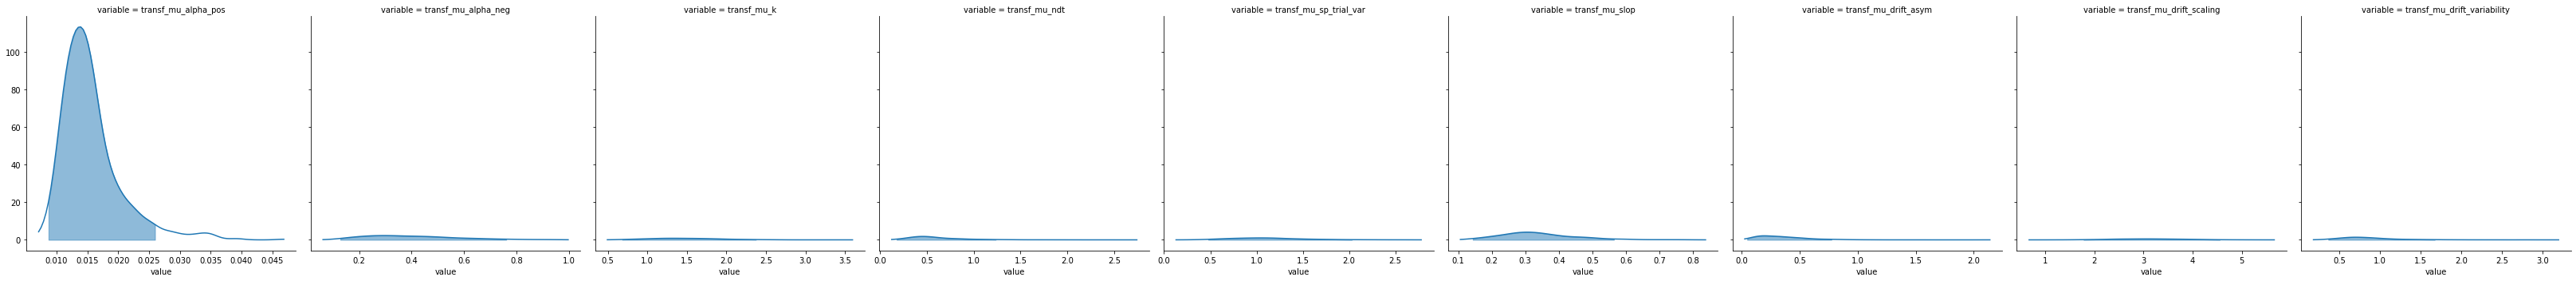

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [13]:
import numpy as np
import seaborn as sns

In [14]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [15]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type,accuracy_rescale,choice_pair,block_bins
0,0,1,1,1,43,39,2,1,1,1.244082,0,0,2,AB,1
1,1,1,1,2,60,50,4,3,1,1.101821,1,0,1,CD,1
2,2,1,1,3,44,36,4,2,2,1.029923,0,0,2,BD,1
3,3,1,1,4,55,55,4,3,2,1.368007,0,0,2,CD,1
4,4,1,1,5,52,49,4,3,3,1.039329,1,0,1,CD,1


#### Ungrouped posterior predictives:

In [16]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)

pp.head()

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.637010  1.787204  1.816935  1.330101  1.381668  1.489815   
2         1.412701  1.326387  1.650270  1.214722  1.437927  1.413921   
3         1.587862  1.548889  1.628673  1.431794  1.465913  1.451019   
4         1.490397  1.650696  1.607806  1.429573  1.748303  1.605306   
5         1.522766  1.654126  1.537558  1.353423  1.668705  1.774940   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      470  471  472  473   
sample                                            ...                           
1         1.385996  1.368093  1.441799  1.299242  ...      1.0  1.0  1.0  1.0   
2         1.274533  1.258984  1.571091  1.208326  ...      1.0  1.0  1.0  1.0   
3         1.350123  1.508907  1.476687  1.271190  ...      1.0  1.0  1.0  1.0   
4         1.391709  1.374209  1.419118  1.458822  ...      1.0  1.0  1.0  1.0   
5         1.917387  1.712193  1.631490  1.489175  ...      1.0  1.0  1.0  1.0   

variable                                
trial     474  475  476  477  478  479  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 958 columns]

#### Grouped posterior predictives:

In [17]:
pp_grouped = model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['choice_pair', 'block_bins'], 
                                                                 n_posterior_predictives=100)

In [18]:
pp_grouped.head()

mean_accuracy   mean_rt  skewness  \
choice_pair block_bins sample                                      
AB          1          1            0.600000  1.351483  0.577322   
                       2            0.733333  1.393386  0.647289   
                       3            0.733333  1.402449  1.592075   
                       4            0.600000  1.425799  0.582937   
                       5            0.666667  1.318048  1.119004   

                               quant_10_rt_incorrect  quant_10_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.177231             1.172921   
                       2                    1.214597             1.166234   
                       3                    1.341391             1.311178   
                       4                    1.335449             1.210492   
                       5                    1.169341             1.133216   

                               quant_30_rt_incorrect  quant_30_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.251176             1.262475   
                       2                    1.440645             1.272652   
                       3                    1.374222             1.357731   
                       4                    1.506114             1.268983   
                       5                    1.200199             1.248625   

                               quant_50_rt_incorrect  quant_50_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.323030             1.338272   
                       2                    1.535542             1.319119   
                       3                    1.394215             1.386414   
                       4                    1.534944             1.326004   
                       5                    1.223095             1.313420   

                               quant_70_rt_incorrect  quant_70_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.357816             1.448601   
                       2                    1.615466             1.347862   
                       3                    1.419574             1.397692   
                       4                    1.628458             1.381837   
                       5                    1.279854             1.379863   

                               quant_90_rt_incorrect  quant_90_rt_correct  
choice_pair block_bins sample                                              
AB          1          1                    1.525158             1.543555  
                       2                    1.751671             1.554519  
                       3                    1.484604             1.454753  
                       4                    1.786301             1.519285  
                       5                    1.556055             1.516388

#### Plot grouped posterior predictives:

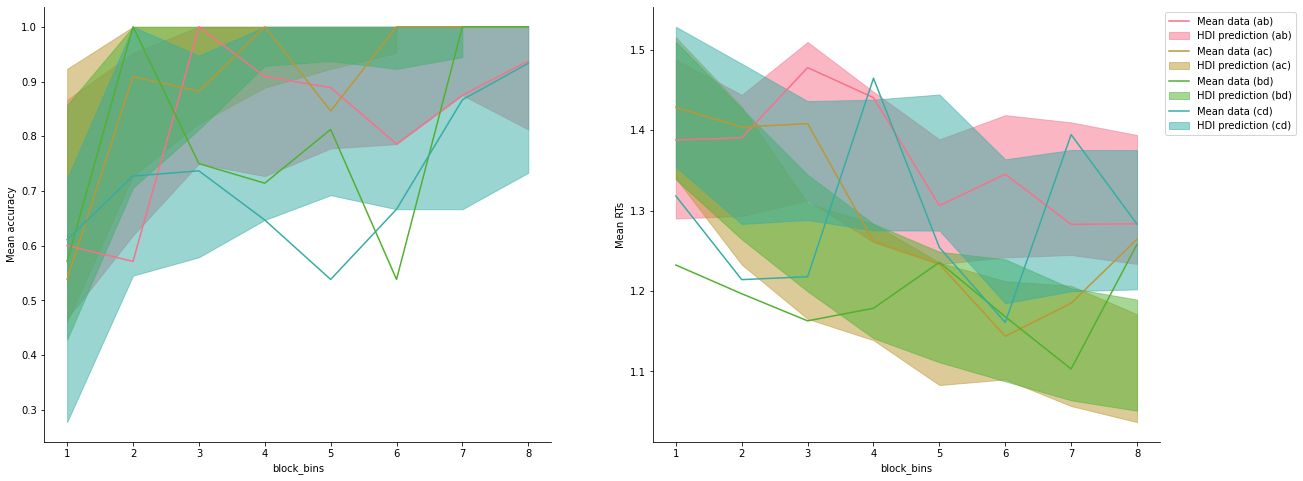

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'],
                                                  n_posterior_predictives=300,
                                                  figsize=(20,8),
                                                  hue_labels=['ab', 'ac', 'bd', 'cd'],
                                                  hue_order=['AB', 'AC', 'BD', 'CD'],
                                                  palette= sns.color_palette('husl'));

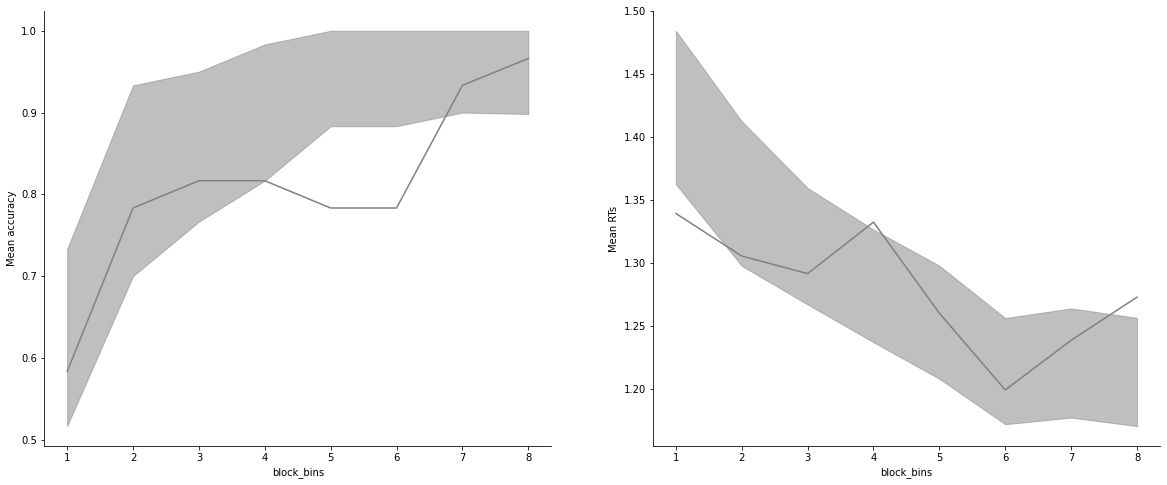

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'],
                                                  n_posterior_predictives=300,
                                                  figsize=(20,8));